In [ ]:
from functools import reduce
import numpy as np, pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pwd

'C:\\Users\\ilgar\\QuadCode'

In [ ]:
deals = pd.read_csv('C:\\Users\\ilgar\\QuadCode\dataset_deals.csv', parse_dates=['create_at', 'close_at'])

In [ ]:
deals.head()

,user_id,instrument_type,create_at,close_at,pnl,volume
0,58124196,cfd,2020-02-10 17:35:44.103000+03:00,2020-02-10 17:37:08.082000+03:00,20316,2000727
1,57944691,cfd,2020-02-06 13:20:55.053000+03:00,2020-02-06 14:51:38.055000+03:00,-37814,1998704
2,57925995,crypto,2020-02-13 07:24:27.036000+03:00,2020-02-13 11:29:04.068000+03:00,-846487,3867023
3,58064247,crypto,2020-02-10 17:57:58.067000+03:00,2020-02-10 18:02:04.057000+03:00,-332474,6006630
4,57848409,forex,2020-02-04 10:23:25.208000+03:00,2020-02-04 11:32:03.601000+03:00,-1016931,20299660


In [ ]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10473 entries, 0 to 10472
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype                                
---  ------           --------------  -----                                
 0   user_id          10473 non-null  int64                                
 1   instrument_type  10473 non-null  object                               
 2   create_at        10473 non-null  datetime64[ns, pytz.FixedOffset(180)]
 3   close_at         10473 non-null  datetime64[ns, pytz.FixedOffset(180)]
 4   pnl              10473 non-null  int64                                
 5   volume           10473 non-null  int64                                
dtypes: datetime64[ns, pytz.FixedOffset(180)](2), int64(3), object(1)
memory usage: 491.0+ KB


In [ ]:
deals.shape

(10473, 6)

In [ ]:
deals.instrument_type.value_counts()

cfd       4177
forex     3972
crypto    2324
Name: instrument_type, dtype: int64

In [ ]:
# Time period of the dataset
print('Min date from create_at : %s' % deals.create_at.min().date())
print('Max date from create_at : %s' % deals.create_at.max().date())
print('Min date from close_at : %s' % deals.close_at.min().date())
print('Max date from close_at : %s' % deals.close_at.max().date())

Min date from create_at : 2020-02-01
Max date from create_at : 2020-02-21
Min date from close_at : 2020-02-01
Max date from close_at : 2020-02-21


In [ ]:
deals.describe()

,user_id,pnl,volume
count,1.047300e+04,1.047300e+04,1.047300e+04
mean,5.789077e+07,-1.149651e+06,1.531856e+07
std,1.422675e+05,1.782110e+07,5.412133e+07
min,5.764248e+07,-9.740030e+08,5.857900e+04
25%,5.778149e+07,-3.823360e+05,1.996482e+06
50%,5.786834e+07,-8.948000e+03,2.438243e+06
75%,5.802388e+07,1.451220e+05,9.286702e+06
max,5.814032e+07,3.899516e+08,9.999998e+08


In [ ]:
deposits = pd.read_csv('C:\\Users\\ilgar\\QuadCode\dataset_deposits.csv', parse_dates=['transaction_created'])

In [ ]:
deposits.head()

,user_id,transaction_type,transaction_sum,transaction_created
0,57723114,deposit,10.000000,2020-02-02 09:43:02
1,57737901,deposit,10.000000,2020-02-02 15:54:38
2,57730809,deposit,9.695176,2020-02-02 19:27:37
3,57791328,deposit,13.000000,2020-02-03 11:56:12
4,57841569,deposit,10.000000,2020-02-04 03:41:51


In [ ]:
deposits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              8771 non-null   int64         
 1   transaction_type     8771 non-null   object        
 2   transaction_sum      8771 non-null   float64       
 3   transaction_created  8771 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 274.2+ KB


In [ ]:
deposits.transaction_type.value_counts()

deposit     7148
withdraw    1623
Name: transaction_type, dtype: int64

In [ ]:
deposits.describe()

,user_id,transaction_sum
count,8.771000e+03,8771.000000
mean,5.789273e+07,17.290301
std,1.559790e+05,391.991882
min,5.764248e+07,-5000.000000
25%,5.774238e+07,10.000000
50%,5.788188e+07,10.000000
75%,5.803430e+07,14.643431
max,5.814032e+07,29700.000000


In [ ]:
deposits.shape

(8771, 4)

In [ ]:
events = pd.read_csv('C:\\Users\\ilgar\\QuadCode\dataset_events.csv', parse_dates=['date_time', 'file_date'])

In [ ]:
events.head()

,platform,user_id,name,date_time,file_date
0,mobile Android,58093662,video-tutorials_open-section,2020-02-22 07:10:14.488000+00:00,2020-02-22
1,Desktop,58098444,deposit-page_loading,2020-02-22 07:57:54.707000+00:00,2020-02-22
2,Desktop,58098444,deposit-page_loading,2020-02-22 07:59:26.364000+00:00,2020-02-22
3,mobile Android,58118019,kyc_new-screen,2020-02-22 05:00:28.586000+00:00,2020-02-22
4,Desktop,58113483,deposit-page_loading,2020-02-22 09:15:19.923000+00:00,2020-02-22


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   platform   16000 non-null  object             
 1   user_id    16000 non-null  int64              
 2   name       16000 non-null  object             
 3   date_time  16000 non-null  datetime64[ns, UTC]
 4   file_date  16000 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


In [ ]:
events.shape

(16000, 5)

In [ ]:
# Time period of the dataset
print('Min date from date_time : %s' % events.date_time.min().date())
print('Max date from date_time : %s' % events.date_time.max().date())

Min date from date_time : 2020-02-01
Max date from date_time : 2020-02-22


In [ ]:
events.platform.value_counts()

mobile Android    8581
Desktop           5970
mobile iOS        1386
Web                 63
Name: platform, dtype: int64

In [ ]:
events.name.value_counts()

kyc_new-screen                  7679
leaderboard_scrolling           2965
video-tutorials_open-section    2547
deposit-page_loading            2092
slow-platform_show               380
tournaments_open-tournament      166
faq                              126
rate-app_rate                     45
Name: name, dtype: int64

In [ ]:
users = pd.read_csv('C:\\Users\\ilgar\\QuadCode\dataset_users.csv', parse_dates=['reg_date'], 
                    thousands = ',')

In [ ]:
users.head()

,user_id,reg_date,region
0,57817176,2020-02-03,Africa
1,58035144,2020-02-06,ACO
2,57821190,2020-02-03,ACO
3,57752121,2020-02-02,ACO
4,57787752,2020-02-03,ACO


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87341 entries, 0 to 87340
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   87341 non-null  int64         
 1   reg_date  87341 non-null  datetime64[ns]
 2   region    87341 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
users.shape

(87341, 3)

In [ ]:
users.region.value_counts()

ACO               69259
Africa            17542
Non-reg Europe      540
Name: region, dtype: int64

In [ ]:
# Time period of the dataset
print('Min date from reg_date : %s' % users.reg_date.min().date())
print('Max date from reg_date : %s' % users.reg_date.max().date())

Min date from reg_date : 2020-02-01
Max date from reg_date : 2020-02-07


Some Functions

In [ ]:
def get_dummies(x):
    """Turn a column of string values into categorical variables through one-hot encoding.

    :param x: Input data frame with original columns
    :type x: Pandas DataFrame
    :returns x: Output data frame with dummy variables
    :rtype x: Pandas DataFrame
    """
    column_names = []
    for i in range(0, len(x.columns)):
        if x.dtypes[i] == 'object':
            column_names.append(x.columns[i])

    dummies = pd.get_dummies(x[column_names])
    x = pd.concat([x.reset_index(drop=True), dummies], axis=1)
    x = x.drop(column_names, axis=1)    

    return x

Data preparation

deposits

In [ ]:
dataframes = [deposits, users]
deposits_df = reduce(lambda left, right: pd.merge(left, right, on='user_id', how='left'), dataframes)
deposits_df['days_since_reg'] = (deposits_df['transaction_created'] - deposits_df['reg_date']).astype('timedelta64[D]')

In [ ]:
aggregations_deposits = {
    'transaction_type': [lambda x: x[x == 'deposit'].count(), lambda x: x[x == 'withdraw'].count()],
    'transaction_sum': ['max','min','median','sum'],
    'days_since_reg': ['max','min', 'median'],
    'region': 'max'
                        }

df_deposits = deposits_df.groupby('user_id').agg(aggregations_deposits).reset_index()
df_deposits.columns = ['user_id','n_type_deposit', 'n_type_withdraw','max_transaction_sum','min_transaction_sum',
                      'median_transaction_sum','total_transaction_sum',
                       'max_days_since_reg','min_days_since_reg', 'avg_days_since_reg', 'region']

In [ ]:
df_deposits_dm = get_dummies(df_deposits)

In [ ]:
df_deposits_dm.drop(df_deposits_dm[df_deposits_dm.max_transaction_sum > 1000].index,
    inplace=True)

(array([1405.,  196.,   93.]),
 array([ 0.        ,  4.66666667,  9.33333333, 14.        ]),
 <a list of 3 Patch objects>)

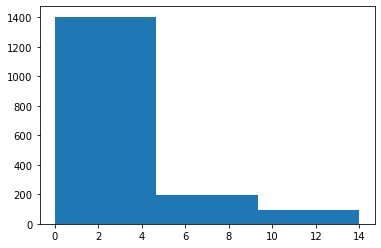

In [ ]:
plt.hist(df_deposits.min_days_since_reg, bins=3)

deals

In [ ]:
deals['deal_term'] = (deals['close_at'] - deals['create_at']).astype('timedelta64[D]')

deals['pnl_cfd'] = np.where(deals['instrument_type'] == 'cfd',deals['pnl'],0)
deals['pnl_forex'] = np.where(deals['instrument_type'] == 'forex',deals['pnl'],0)
deals['pnl_crypto'] = np.where(deals['instrument_type'] == 'crypto',deals['pnl'],0)

In [ ]:
dataframes = [deals, users]
deals_df = reduce(lambda left, right: pd.merge(left, right, on='user_id', how='left'), dataframes)
deals_df['days_since_reg'] = (deals_df['create_at'].dt.tz_localize(None) 
                              - deals_df['reg_date']).astype('timedelta64[D]')

In [ ]:
aggregations_deals = {
    'instrument_type': [lambda x: x[x == 'cfd'].count(), lambda x: x[x == 'forex'].count(),
                       lambda x: x[x == 'crypto'].count()],
    'pnl': ['max','min','median','sum'],
    'volume': ['max','min','median','sum'],
    'deal_term': ['max','min','median'],
    'pnl_cfd': ['max','min','median','sum'],
    'pnl_forex': ['max','min','median','sum'],
    'pnl_crypto': ['max','min','median','sum'],
    'days_since_reg': ['max','min', 'median']
                        }

df_deals = deals_df.groupby('user_id').agg(aggregations_deals).reset_index()
df_deals.columns = ['user_id','n_type_cfd', 'n_type_forex','n_type_crypto', 
                    'max_pnl','min_pnl','median_pnl','pnl_sum',
                    'max_volume','min_volume','median_volume','volume_sum',
                    'max_deal_term','min_deal_term','median_deal_term',
                   'max_pnl_cfd','min_pnl_cfd','median_pnl_cfd','pnl_cfd_sum',
                   'max_pnl_forex','min_pnl_forex','median_pnl_forex','pnl_forex_sum',
                   'max_pnl_crypto','min_pnl_crypto','median_pnl_crypto','volume_pnl_crypto',
                   'max_days_since_reg','min_days_since_reg','avg_days_since_reg']

In [ ]:
df_deals.drop(df_deals[df_deals.max_pnl > 100000000].index,
    inplace=True)

(array([543.,  25.,  11.,   6.,   3.,   1.,   4.,   2.,   1.,   1.,   1.,
          1.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <a list of 12 Patch objects>)

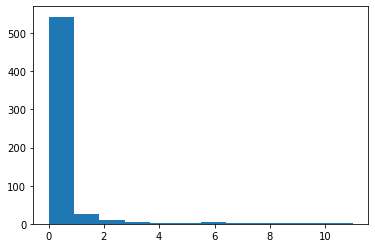

In [ ]:
plt.hist(df_deals.median_deal_term, bins=12)

(array([338.,  52.,  40.,  35.,  24.,  23.,  32.,   7.,   8.,   8.,  11.,
         21.]),
 array([ 0.        ,  1.16666667,  2.33333333,  3.5       ,  4.66666667,
         5.83333333,  7.        ,  8.16666667,  9.33333333, 10.5       ,
        11.66666667, 12.83333333, 14.        ]),
 <a list of 12 Patch objects>)

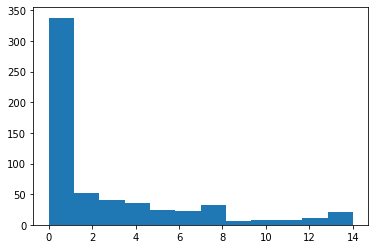

In [ ]:
plt.hist(df_deals.min_days_since_reg, bins=12)

event

In [ ]:
dataframes = [events, users]
events_df = reduce(lambda left, right: pd.merge(left, right, on='user_id', how='left'), dataframes)
events_df['days_since_reg'] = (events_df['file_date'] - events_df['reg_date']).astype('timedelta64[D]')

events_df['kyc_new-screen'] = np.where(events_df['name'] == 'kyc_new-screen',1,0)
events_df['leaderboard_scrolling'] = np.where(events_df['name'] == 'leaderboard_scrolling',1,0)
events_df['video-tutorials'] = np.where(events_df['name'] == 'video-tutorials_open-section',1,0)
events_df['deposit'] = np.where(events_df['name'] == 'deposit-page_loading',1,0)

In [ ]:
aggregations_events = {
    'platform': [lambda x: x.value_counts().index[0] if len(x.value_counts()) else None],
    'name': [lambda x: x.value_counts().index[0] if len(x.value_counts()) else None],
    'days_since_reg': ['min','max','median'],
    'kyc_new-screen': 'max',
    'leaderboard_scrolling': 'max',
    'video-tutorials': 'max',
    'deposit': 'max',
                        }

df_events = events_df.groupby('user_id').agg(aggregations_events).reset_index()
df_events.columns = ['user_id','pref_platform','pref_name', 
                     'min_days_since_reg','max_days_since_reg','avg_days_since_reg',
                     'kyc_new-screen',
                    'leaderboard','video','deposit']

In [ ]:
df_events_dm = get_dummies(df_events)

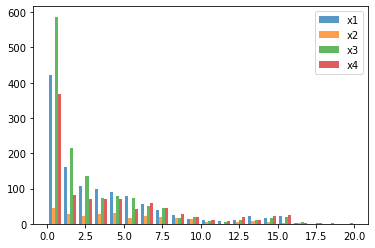

In [ ]:
x1 = df_events[df_events['kyc_new-screen'] == 1].avg_days_since_reg
x2 = df_events[df_events.leaderboard == 1].avg_days_since_reg
x3 = df_events[df_events.video == 1].avg_days_since_reg
x4 = df_events[df_events.deposit == 1].avg_days_since_reg

plt.hist([x1,x2,x3,x4], alpha=0.75, bins=20,label=['x1', 'x2','x3','x4'])
plt.legend(loc='upper right')
plt.show()

Let's get all the data together

In [ ]:
print (df_deposits_dm.shape, df_deals.shape, df_events_dm.shape)

(1666, 13) (599, 30) (3440, 20)


In [ ]:
dataframes = [df_events_dm, df_deposits_dm, df_deals]
customer_data = reduce(lambda left, right: pd.merge(left, right, on='user_id', how='left'), dataframes)

#customer_data = df_deals

In [ ]:
customer_data.isna().any().any()

True

In [ ]:
customer_data.shape

(3440, 61)

Let's look at some Algorithms!

Some ML Functions

In [ ]:
def standard_normalized_vars(x):
    column_names = []
    for i in range(0,len(x.columns)):
        if x.dtypes[i] in ['int64','float64','uint8']:
            column_names.append(x.columns[i])    
    x[column_names] = x[column_names].fillna(0)
    x[column_names] = x[column_names].astype(float)
    df = x[column_names].values #returns a numpy array
    min_max_scaler = preprocessing.StandardScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(x_scaled)
    df.columns = column_names
    x[column_names] = df[column_names]
    return x

In [ ]:
def pca_reduce(x, comp_n):
    pca_in = x.copy()
    pca_n = PCA(n_components=comp_n, 
          copy=True, 
          whiten=False, 
          svd_solver='auto', 
          tol=0.0, 
          iterated_power='auto', 
          random_state=0)
    X_pca = pca_n.fit(pca_in)
    trans_pca = pca_n.transform(pca_in)
    df_pca = pd.DataFrame(trans_pca)
    variance_ratio = X_pca.explained_variance_ratio_
    print('pca_components ',comp_n,'   describe ',sum(variance_ratio))
    return df_pca

In [ ]:
def train_kmeans(x, k):
    KMModel = KMeans(n_clusters=k, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=600, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto')
    KMModel.fit(x) 
    print("kmeans,", k, "clusters:   ",
          "calinski_harabaz_score", calinski_harabasz_score(x, KMModel.labels_), "   ",
          "silhouette_score", silhouette_score(x, KMModel.labels_),'\n' )
    return KMModel

In [ ]:
ids = customer_data.user_id.copy()

In [ ]:
customer_data.drop('user_id', axis=1, inplace=True)

In [ ]:
customer_data = standard_normalized_vars(customer_data)

In [ ]:
customer_data.isna().any().any()

False

In [ ]:
pca_components = [15, 25,35]
clusters = [3, 6, 9]
for cmp in pca_components:
    for k in clusters:
        df = customer_data.copy()
        # reduce features
        pca_df = pca_reduce(df, cmp)
        
        #cluster!
        model = train_kmeans(pca_df, k)

pca_components  15    describe  0.6886336404165432
kmeans, 3 clusters:    calinski_harabaz_score 579.4465204115783     silhouette_score 0.5155280782578439 

pca_components  15    describe  0.6886336404165432
kmeans, 6 clusters:    calinski_harabaz_score 506.05361114948266     silhouette_score 0.3597346362983815 

pca_components  15    describe  0.6886336404165432
kmeans, 9 clusters:    calinski_harabaz_score 483.5458333940035     silhouette_score 0.40746050086604807 

pca_components  25    describe  0.8691845588537859
kmeans, 3 clusters:    calinski_harabaz_score 431.3891933517202     silhouette_score 0.47801228287898245 

pca_components  25    describe  0.8691845588537859
kmeans, 6 clusters:    calinski_harabaz_score 350.03974317254597     silhouette_score 0.3010475548616102 

pca_components  25    describe  0.8691845588537859
kmeans, 9 clusters:    calinski_harabaz_score 305.78991620654165     silhouette_score 0.31128468483664656 

pca_components  35    describe  0.9675297751825281
k

In [ ]:
pca_df = pca_reduce(df, 25)
model = train_kmeans(pca_df, 3)

pca_components  25    describe  0.8691845588537859
kmeans, 3 clusters:    calinski_harabaz_score 431.3891933517202     silhouette_score 0.47801228287898245 



In [ ]:
def pca_3d(df):   
    pca = PCA(n_components=3, 
          copy=True, 
          whiten=False, 
          svd_solver='auto', 
          tol=0.0, 
          iterated_power='auto', 
          random_state=0)
    X_pca = pca.fit(df)
    trans_pca = X_pca.transform(df)
    pca3_df = pd.DataFrame(trans_pca)
    pca3_df.columns = ['x','y','z']
    print('explained_variance_ratio', X_pca.explained_variance_ratio_)
    
    return pca3_df

In [ ]:
pca3_df = pca_3d(pca_df)

clusters = pd.DataFrame(model.labels_)
clusters.columns = ['clusters']

df_3d = pd.concat([pca3_df, clusters], axis=1, join='inner')

explained_variance_ratio [0.17171358 0.09907008 0.0670574 ]


In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)

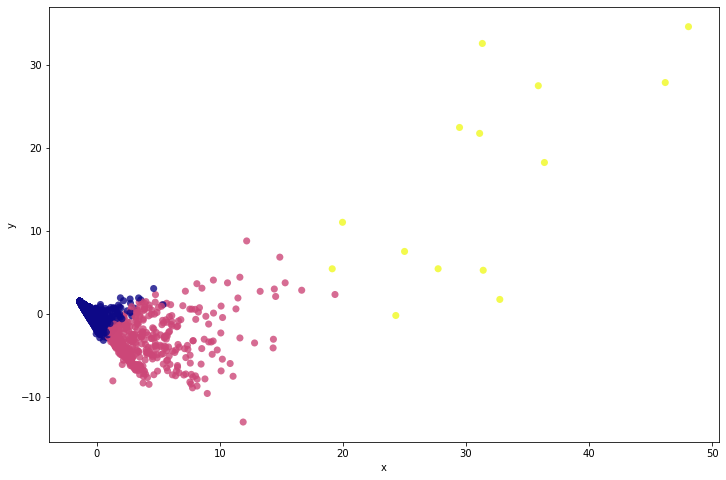

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df_3d.x.values, df_3d.y.values, s=50, lw=0,
           c=df_3d.clusters.values, cmap='plasma', alpha=0.8)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

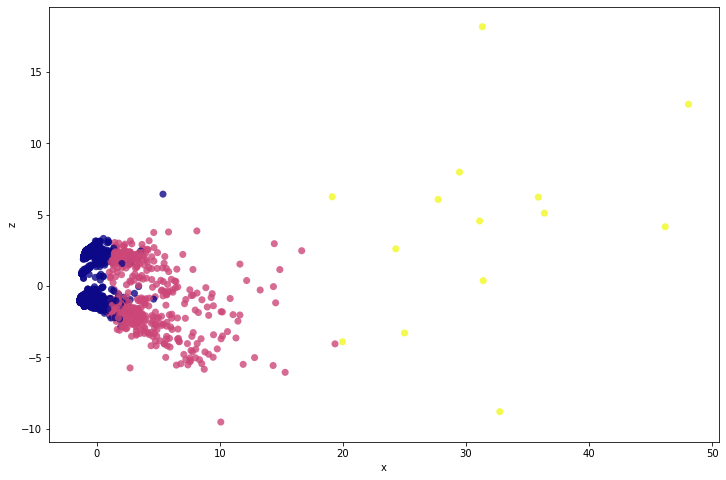

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df_3d.x.values, df_3d.z.values, s=50, lw=0,
           c=df_3d.clusters.values, cmap='plasma', alpha=0.8)

ax.set_xlabel('x')
ax.set_ylabel('z')
plt.show()

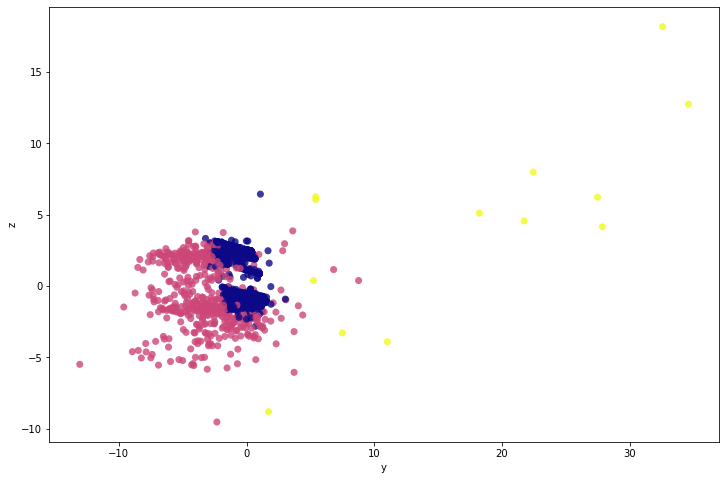

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df_3d.y.values, df_3d.z.values, s=50, lw=0,
           c=df_3d.clusters.values, cmap='plasma', alpha=0.8)

ax.set_xlabel('y')
ax.set_ylabel('z')
plt.show()

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = ids
cluster_map['cluster'] = model.labels_

In [ ]:
cluster_map

,data_index,cluster
0,57642480,0
1,57642528,1
2,57642540,0
3,57643314,1
4,57643656,0
...,...,...
3435,58140369,0
3436,58140390,0
3437,58140459,0
3438,58140474,0


In [ ]:
cluster_map.cluster.value_counts()

0    2928
1     498
2      14
Name: cluster, dtype: int64

In [ ]:
cluster_map[cluster_map.cluster == 2] #suspicious cluster for security check

,data_index,cluster
142,57692298,2
143,57693381,2
205,57725100,2
222,57728628,2
521,57799167,2
913,57886605,2
959,57898365,2
998,57909144,2
1086,57932349,2
1521,57980166,2
